## Compare KQC qubit EPRs simulated only using Elmer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({
    "font.family" : "serif",
    "mathtext.fontset" : "dejavuserif",
    "figure.dpi": 200,
    "font.size": 14,
    })

def plot_total_eprs(df, xlabels ,max_y=(0.7, 1.3), plot_title=""):

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(plot_title)

    n_cases = df.shape[0]

    group_eprs = {group: 1e6 * df[f"p_{group}"] for group in ["MA", "MS", "SA"]}
    group_eprs_vol = {group: df[f"p_{group}"] for group in ["substrate", "vacuum"]}

    width = 0.4
    bottom = np.zeros(n_cases)
    for boolean, group_participation in group_eprs.items():
        ax[0].bar(xlabels, group_participation, width, label=boolean, bottom=bottom)
        bottom = np.add(bottom, group_participation, casting="unsafe")

    ax[0].set_title(r"Total interface participation")
    ax[0].set_xticks(range(n_cases), xlabels, rotation=0)
    ax[0].legend(loc="upper right", framealpha=1)
    ax[0].set_ylim([0, max_y[0]])
    ax[0].set_ylabel("participation ($10^{-6}$)")

    bottom = np.zeros(n_cases)
    for boolean, group_participation in group_eprs_vol.items():
        ax[1].bar(xlabels, group_participation, width, label=boolean, bottom=bottom)
        bottom = np.add(bottom, group_participation, casting="unsafe")

    ax[1].set_title("Total volume participation")
    ax[1].set_xticks(range(n_cases), xlabels, rotation=0)
    ax[1].legend(loc="upper left", framealpha=1)
    ax[1].set_ylim([0, max_y[1]])
    ax[1].set_ylabel("participation")

    for a in ax:
        a.set_axisbelow(True)
        a.grid(True, axis="y")

    plt.show()



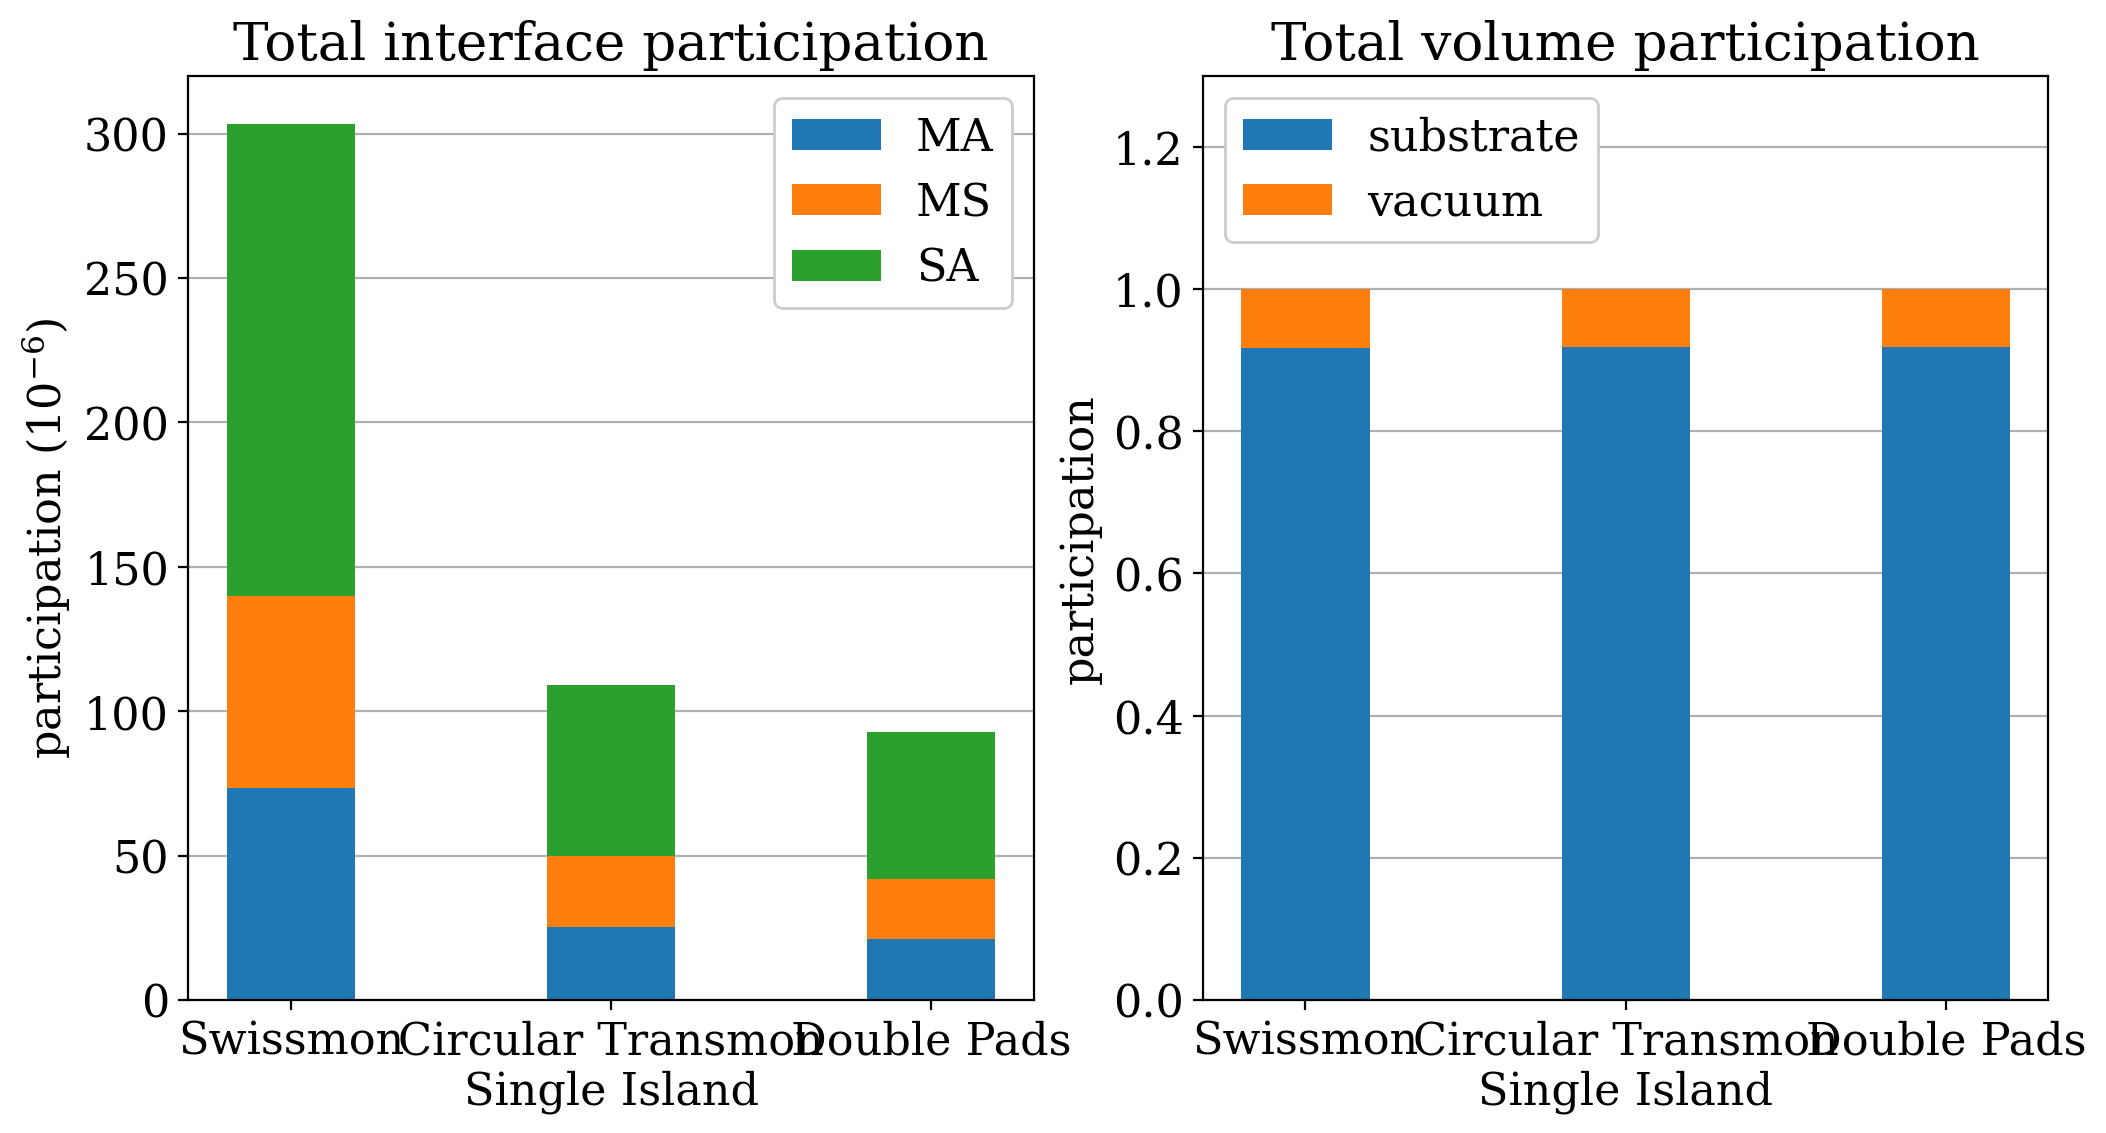

In [2]:
dfs = pd.concat(
    [pd.read_csv("swissmon_epr_sim_output_epr.csv"),
    pd.read_csv("circular_transmon_single_island_epr_sim_output_epr.csv"),
    pd.read_csv("double_pads_epr_sim_output_epr.csv")]
    )

names = ["Swissmon", "Circular Transmon\nSingle Island", "Double Pads"]

plot_total_eprs(dfs,names,  max_y=[320, 1.3])